In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('statfaction-eng.csv')

In [6]:
# Check for missing values
data.isnull().sum()

age            0
gender         0
merital        0
n_children     0
education      0
nationality    0
religion       0
v1             0
v2             0
v3             0
v4             0
v5             0
v6             0
v7             0
v8             0
v9             0
v10            0
v11            0
dtype: int64

In [7]:
# Basic descriptive statistics
data.describe()

,age,n_children,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,40.597087,2.082524,7.655340,7.228155,7.689320,8.412621,7.703883,7.597087,9.048544,7.611650,7.466019,7.325243,3.703883
std,8.713757,1.313341,1.918497,2.304054,1.995258,1.667373,2.128708,1.957547,1.275500,1.814484,2.324065,2.342824,1.683401
min,22.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,1.000000,7.000000,6.000000,7.000000,7.250000,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,2.000000
50%,41.000000,2.000000,8.000000,8.000000,8.000000,9.000000,8.000000,8.000000,9.000000,8.000000,8.000000,8.000000,4.000000
75%,46.000000,3.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000,10.000000,9.000000,9.000000,9.000000,5.000000
max,68.000000,6.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.000000


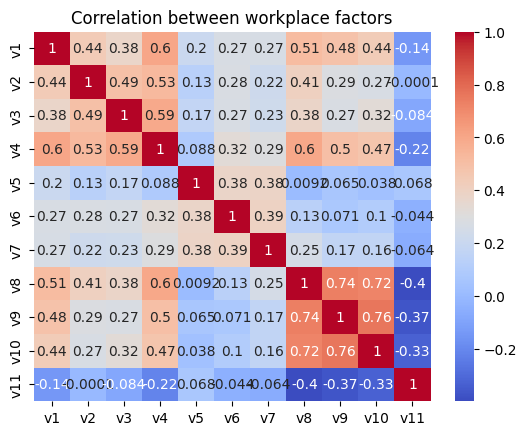

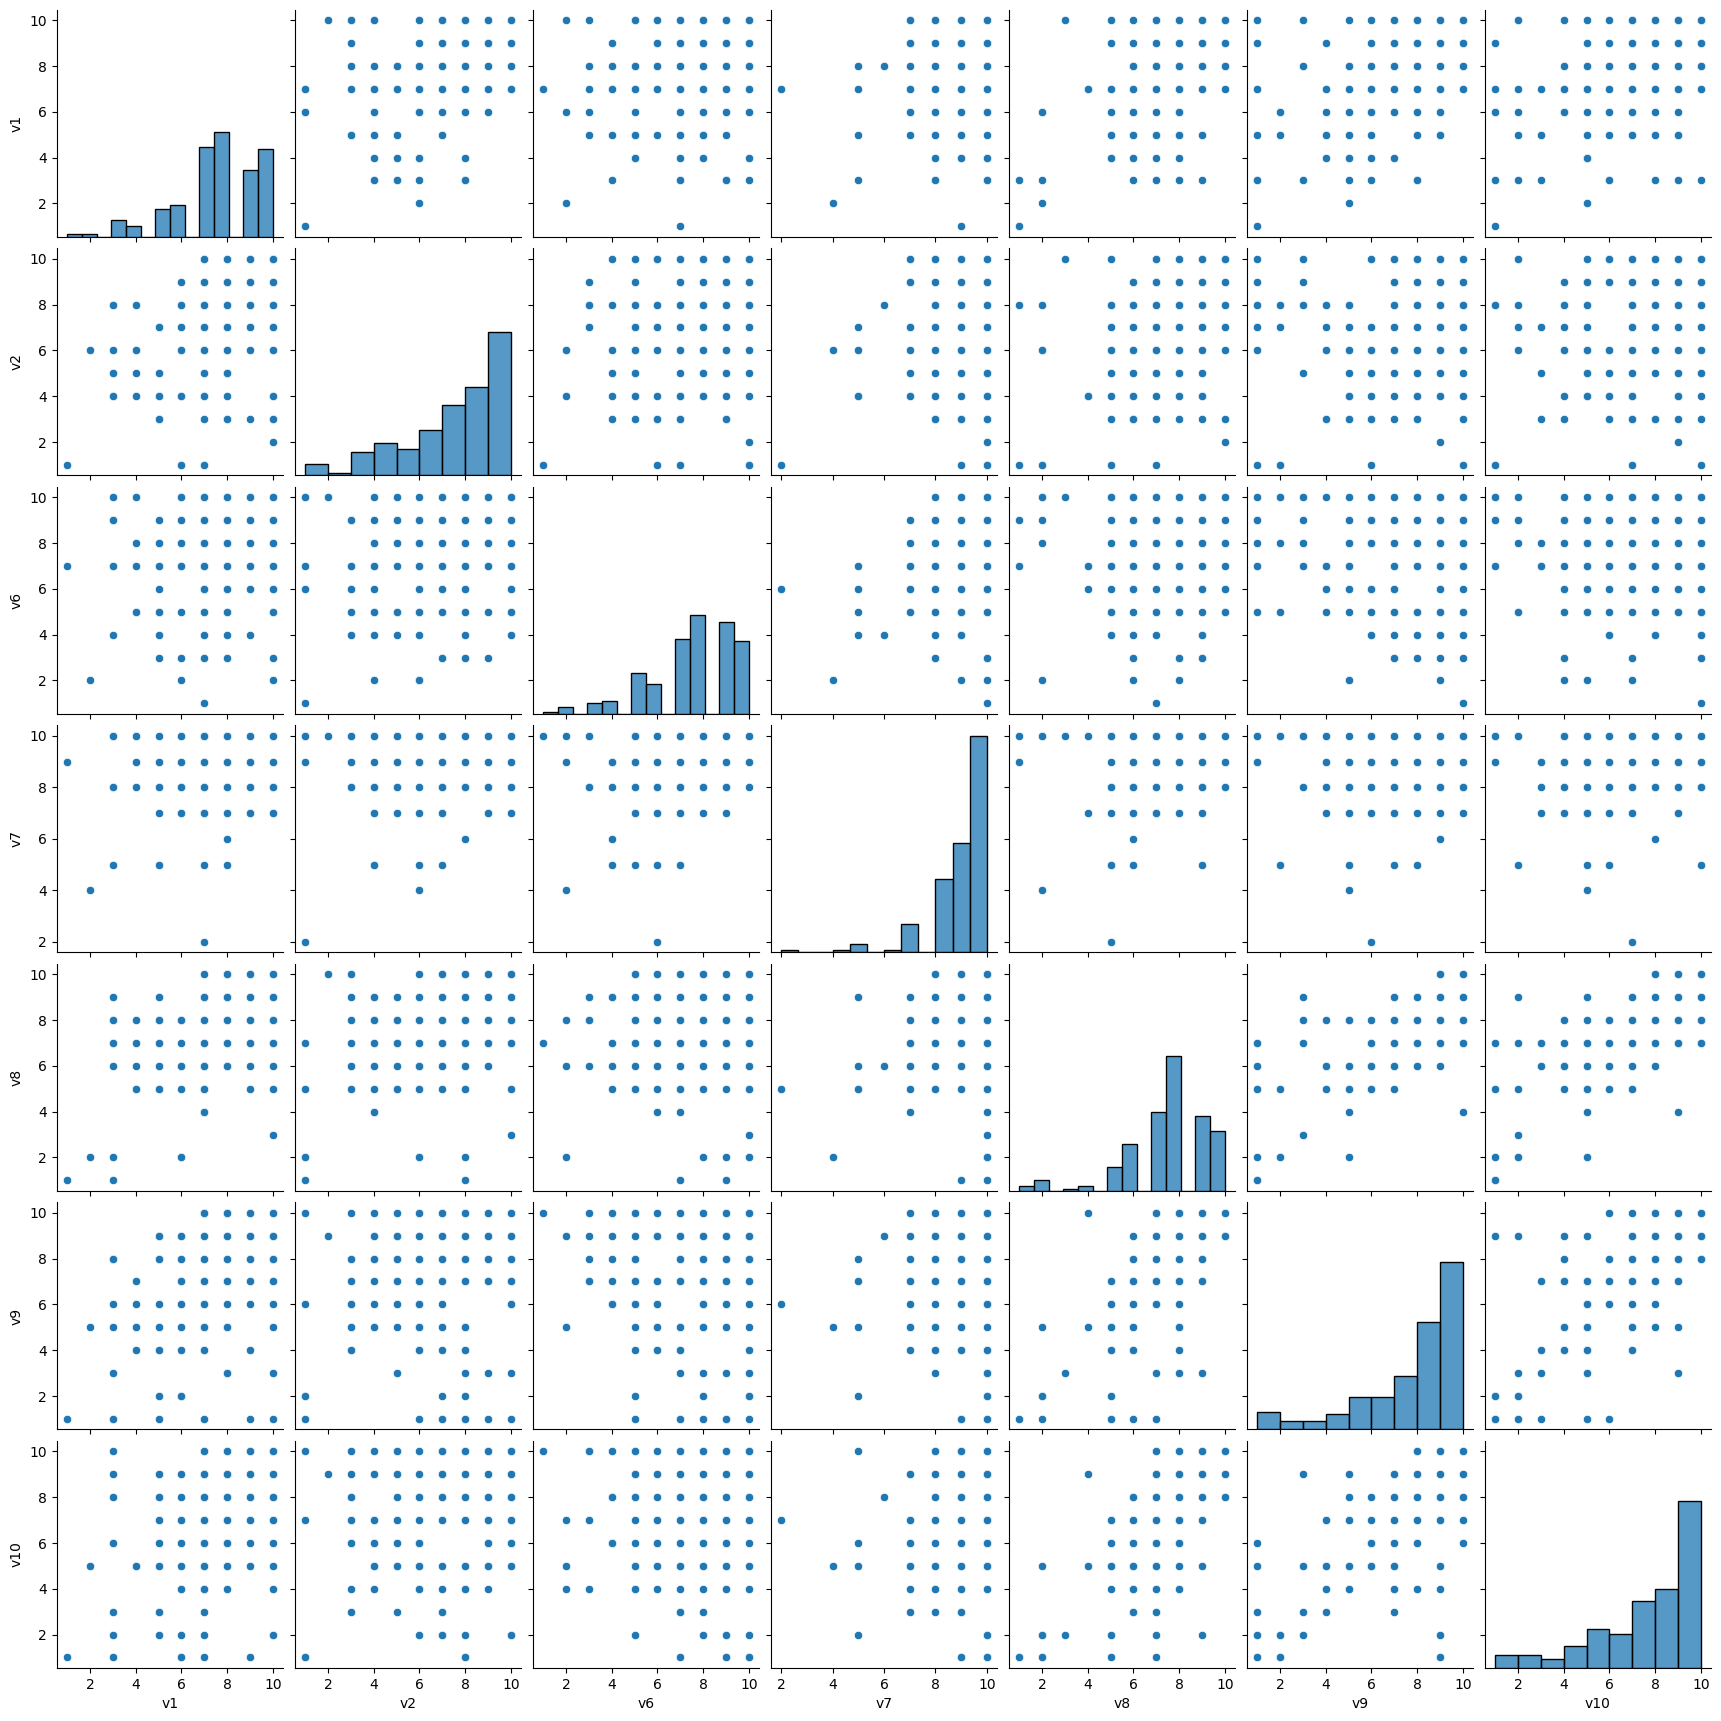

In [8]:
# Correlation matrix to understand relationships between variables
correlation_matrix = data[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11']].corr()

# Heatmap for visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between workplace factors')
plt.show()

# Pairplot to visualize relationships (optional)
sns.pairplot(data[['v1', 'v2', 'v6', 'v7', 'v8', 'v9', 'v10']])
plt.show()

In [10]:
# Normalize variables (optional)
from sklearn.preprocessing import MinMaxScaler

# Select the relevant columns
selected_columns = ['v1', 'v2', 'v6', 'v7', 'v8', 'v9', 'v11']
data_selected = data[selected_columns]

# Normalize the variables to a 0-1 range
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_selected), columns=selected_columns)

# Invert fatigue-related variables (v6 and v7) by subtracting from 1
data_scaled['v6'] = 1 - data_scaled['v6']
data_scaled['v7'] = 1 - data_scaled['v7']

# Calculate Satisfaction Index (simple average of selected variables)
data['Satisfaction_Index'] = data_scaled.mean(axis=1)

# Display the first few Satisfaction Index scores
print(data[['Satisfaction_Index']].head())

   Satisfaction_Index
0            0.563492
1            0.392857
2            0.611111
3            0.519841
4            0.468254
